# Global air pollution analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
file_path = './../data/globalAir.csv'

In [3]:
df = pd.read_csv(file_path)
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


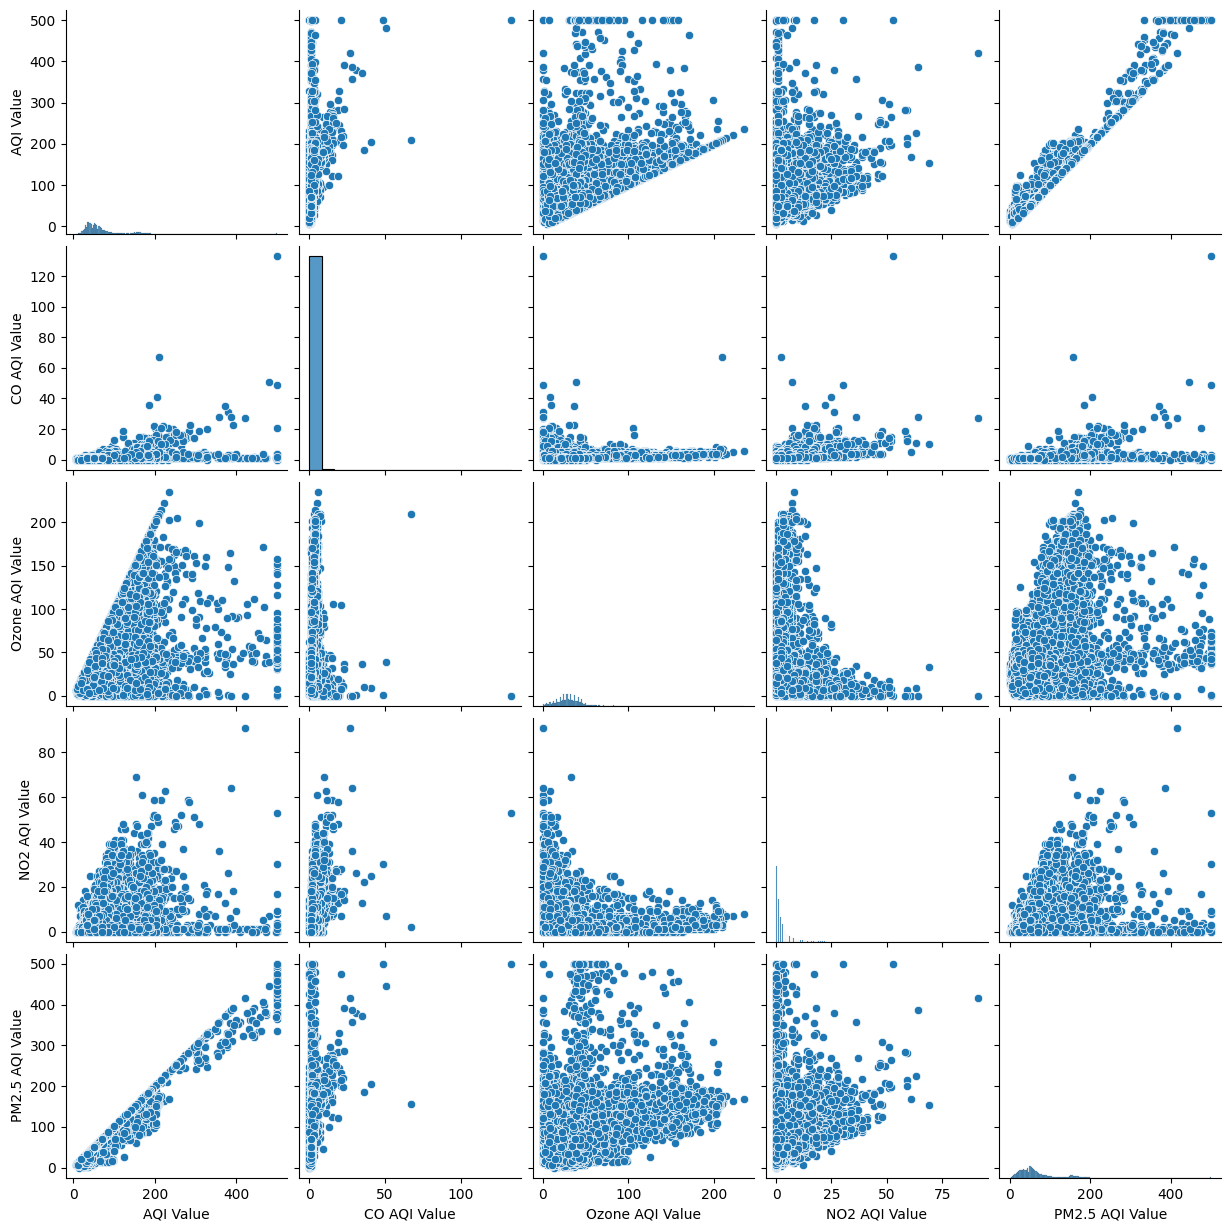

In [4]:
sns.pairplot(df)
plt.show()

# as there a likely linear corelation between aqi value and pm2.5 aqi value we can predict aqi based on that feature to a greater extent and the accuracy will be high

# data is already clean

In [5]:
df['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [6]:
#now lets change the object type to string

In [7]:
df['AQI Category'] = df['AQI Category'].astype(str)
df['CO AQI Category'] = df['CO AQI Category'].astype(str)
df['Ozone AQI Category'] = df['Ozone AQI Category'].astype(str)
df['NO2 AQI Category'] = df['NO2 AQI Category'].astype(str)
df['PM2.5 AQI Category'] = df['PM2.5 AQI Category'].astype(str)
df['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [8]:
encoder = LabelEncoder()

In [9]:
category_to_range = {
    'Good': 5,
    'Moderate': 4,
    'Unhealthy for Sensitive Groups': 3,
    'Unhealthy': 2,
    'Very Unhealthy': 1,
    'Hazardous': 0
}

# changing categorical data to numerical data

In [10]:
# df['AQI Category'] = encoder.fit_transform(df['AQI Category'])
# df['CO AQI Category'] = encoder.fit_transform(df['CO AQI Category'])
# df['Ozone AQI Category'] = encoder.fit_transform(df['Ozone AQI Category'])
# df['NO2 AQI Category'] = encoder.fit_transform(df['NO2 AQI Category'])
# df['PM2.5 AQI Category'] = encoder.fit_transform(df['PM2.5 AQI Category'])
df['AQI Category'] = df['AQI Category'].str.strip()
df['CO AQI Category'] = df['CO AQI Category'].str.strip()
df['Ozone AQI Category'] = df['Ozone AQI Category'].str.strip()
df['NO2 AQI Category'] = df['NO2 AQI Category'].str.strip()
df['PM2.5 AQI Category'] = df['PM2.5 AQI Category'].str.strip()

df['AQI Category'] = (df['AQI Category']).map(category_to_range)
df['CO AQI Category'] = (df['CO AQI Category']).map(category_to_range)
df['Ozone AQI Category'] = (df['Ozone AQI Category']).map(category_to_range)
df['NO2 AQI Category'] = (df['NO2 AQI Category']).map(category_to_range)
df['PM2.5 AQI Category'] = (df['PM2.5 AQI Category']).map(category_to_range)


# strip plays a key role in changing categorical data to numerical data please dont avoiod it

In [11]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,4,1,5,36,5,0,5,51,4
1,Brazil,Presidente Dutra,41,5,1,5,5,5,1,5,41,5
2,Italy,Priolo Gargallo,66,4,1,5,39,5,2,5,66,4
3,Poland,Przasnysz,34,5,1,5,34,5,0,5,20,5
4,France,Punaauia,22,5,0,5,22,5,0,5,6,5


In [12]:
# lets start working

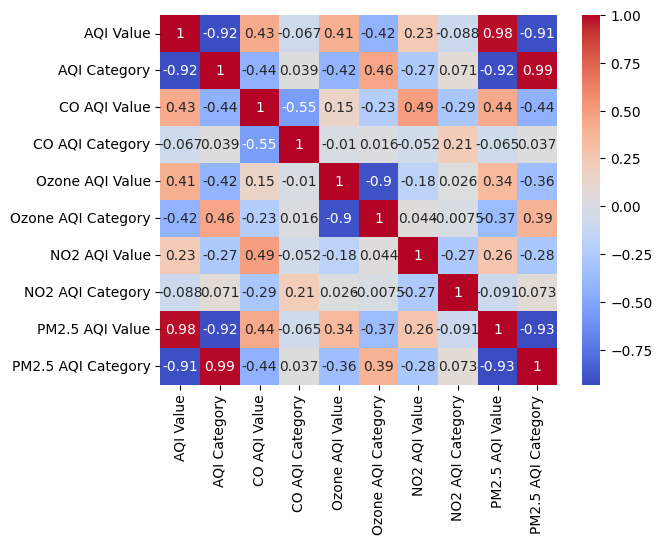

In [13]:
Corr = df.drop(['Country','City'],axis = 1)
corr_matrix = Corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
X = df.drop(['AQI Value','Country','City'],axis = 1)
X


,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,4,1,5,36,5,0,5,51,4
1,5,1,5,5,5,1,5,41,5
2,4,1,5,39,5,2,5,66,4
3,5,1,5,34,5,0,5,20,5
4,5,0,5,22,5,0,5,6,5
...,...,...,...,...,...,...,...,...,...
23458,2,3,5,154,2,2,5,184,2
23459,5,1,5,20,5,5,5,50,5
23460,5,1,5,22,5,1,5,50,5
23461,4,1,5,44,5,2,5,71,4


In [15]:
y = df['AQI Value']
y

0         51
1         41
2         66
3         34
4         22
        ... 
23458    184
23459     50
23460     50
23461     71
23462     70
Name: AQI Value, Length: 23463, dtype: int64

# Training our model

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [17]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,24)

In [18]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)
    if neighbor == 1:
        print(test_accuracies[neighbor])

0.6946516087790326


# Plotting the results

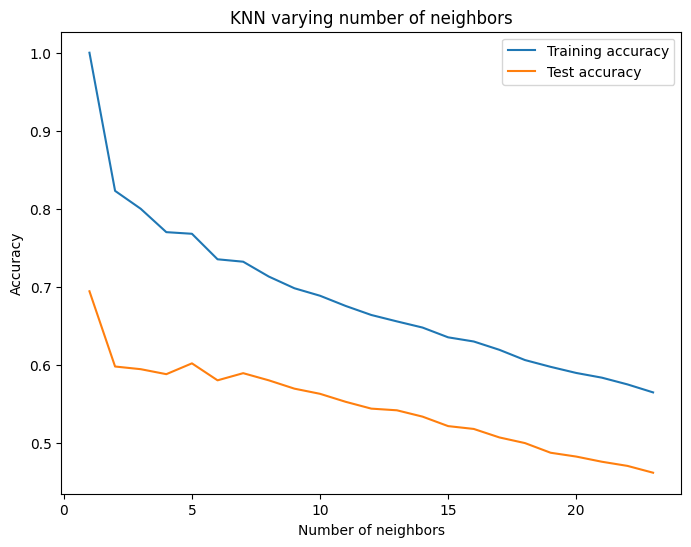

In [19]:
plt.figure(figsize = (8,6))
plt.title("KNN varying number of neighbors")
plt.plot(neighbors,train_accuracies.values(),label = "Training accuracy")
plt.plot(neighbors,test_accuracies.values(),label = "Test accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

# as we can see that increasing k values are causing the data to deviate form accurate results

In [20]:
#for train data the score is highest at the least k value and same for the testing data and for testing data the score is max at k = 1 or nearly 1